# Proyecto Final - Clasificación por Perceptrón

## Introducción

El perceptrón representa una neurona artificial, que es capaz de aprender una salida respecto a una entrada.

El perceptrón es un modelo matemático que toma un vector de características como entradas y a través de unos pesos internos que guarda el perceptrón es capaz de modificar las características y convertirlas en un valor escalar de salida mediante una función o modelo de activación.

El perceptrón se podría denotar como:

$y = P_f[w, β](x)$

Donde:

* $f$ es la función de activación que puede ser una sigmoide, una tangente hiporbólica, una función `softmax`, un rectificador lineal (`relu`) o en genral cualquier función $f(z) := ℜ ⇒ ℜ$.
* $w$ es un vector de pesos, con la misma cardinalidad que $x$ ($|x| = |w|$), es decir, por cada entrada existirá un peso.
* $β$ es un escalar que representa el aprendizaje constante, es decir, un valor independiente a las entradas.

La sigmoide es una de las funciones de activación más utilizadas para transformar el espacio de $(-∞, ∞)$ al espacio entre $(0, 1)$. Esto quiere decir que la función sigmoide o logística, nos permite transformar un espacio $ℜ$ en un espacio normal.

$f(z) = \frac{1}{1 + e^{-z}}$

Esto significa que si $z → ∞$ entonces $e^{-z} = e^{-∞} = 0$, por lo tanto $f(z → ∞) = \frac{1}{1 + 0} = 1$.

Esto también significa que si $z → -∞$ entonces $e^{-(-z)} = e^z = e^{∞} = ∞$, por lo tanto $f(z → -∞) = \frac{1}{1 + ∞} = \frac{1}{∞} = 0$.

![Sigmoide](https://th.bing.com/th/id/R.985057b1f28ef2ab7a95c7b84b2d3c06?rik=VY4pa4zaqnQ8og&riu=http%3a%2f%2fronny.rest%2fmedia%2fblog%2f2017%2f2017_08_10_sigmoid%2fsigmoid_plot.jpg&ehk=OailFWoiQZSkaAj6%2bixrAuW0O6fONpHkATXuVOSucBA%3d&risl=&pid=ImgRaw&r=0)

Existen otras funciones de activación para otros espacios como la Tangente Hiperbólica (`tanh`) que transformaría el espacio de $(-∞, ∞)$ en el espacio de $(-1, 1)$.

![Tanh](https://paperswithcode.com/media/methods/Screen_Shot_2020-05-27_at_4.23.22_PM_dcuMBJl.png)

## Perceptrón en 1-variable

1-variable representa una característica, por ejemplo, la estatura de una persona, el peso de una persona o el precio de un producto.

$x_i$ - Representa una sola característica de análisis

Podríamos tener un conjunto de datos con una sola característica y un solo objetivo, por ejemplo, la estatura de una persona y si fue aceptada en el ejército.

| ESTATURA | ACEPTADA |
| :------: | :------: |
| 1.80     | 1        |
| 1.75     | 1        |
| 1.67     | 0        |
| 1.71     | 1        |
| 1.68     | 1        |
| 1.65     | 0        |
| 1.53     | 0        |
| 1.83     | 1        |
| 1.90     | 1        |

$y = P_{sigmoid}[w, β](x_i)$

### Problema

Un clasificador es un modelo capaz de predecir una variable objetivo a partir de un vector de características.

El perceptrón es un clasificador capaz de entrenar los pesos y el *bias* para lograr que dadas las características como entrada, logremos la salida correcta. Si la salida no es adecuada, entonces podemos reajustar los pesos, hasta que la salida sea la más correcta, o correcta en la mayoría de los casos.

### Paso 1 - Definir el conjunto de datos

In [1]:
import numpy as np

X = np.array([
    [1.80], # 1-muestra con 1-variable
    [1.75], # 2-muestra con 1-variable
    [1.67], # ...
    [1.71],
    [1.68],
    [1.65],
    [1.53],
    [1.83],
    [1.90], # n-muestra con 1-variable
])

y = np.array([1, 1, 0, 1, 1, 0, 0, 1, 1])

### Paso 2 - Definir el vector de pesos del perceptrón y el bias

In [99]:
w = np.array([ 0.1 ]) # Inicializamos un único peso para 1-variable

b = -0.1 # Inicializamos el bias que es un escalar

### Paso 3 - Evaluar el perceptrón con sus pesos

In [137]:
def P_sigmoid(x):
  global w, b
  def f(z):
    return 1. / (1. + np.exp(-z))
  #z = w[0] * x[0] + b # Modelo lineal z = w * x + b
  z = b
  for j in range(len(x)):
    z += w[j] * x[j]
  return f(z)

Calculamos el valor del perceptrón para una altura de 1.80 ($x_i = 1.8$)

In [5]:
y_predict = P_sigmoid([1.8])

y_predict

0.5199893401555818

Si ajustamos los pesos del perceptrón, la predicción cambiará.

In [6]:
w[0] = 0.8
b = -3.4

y_predict = P_sigmoid([1.8])

y_predict

0.12346704756522402

In [7]:
P_sigmoid([1.53])

0.10192649525878314

### Paso 4 - Algoritmo de entrenamiento (`fit`)

In [125]:
def fit_step(X, y):
  global w, b

  alfa = 1.0

  for i in range(len(X)):
    xi = X[i] # [1.80] --> [1.75] --> ... --> [1.65] --> ...
    yi = y[i] #   1    -->   1    --> ... -->   0    --> ...

    y_predict = P_sigmoid(xi) # P_sigmoid([1.8]) --> P_sigmoid([1.75]) --> ...

    error = (yi - y_predict) # (1 - 0.1234)^2 --> (1 - 0.101...)^2

    for j in range(len(xi)):
      w[j] = w[j] + alfa * error * xi[j]

    b = b + alfa * error

  return w, b

In [138]:
fit_step(X, y)

(array([345.38649585]), -578.1209842757667)

In [130]:
for t in range(100_000):
  fit_step(X, y)

w, b, P_sigmoid([1.80]), P_sigmoid([1.68]), P_sigmoid([1.67]), P_sigmoid([1.65])

(array([345.38594391]),
 -578.1200585128397,
 1.0,
 0.8936261040008864,
 0.20989935402679255,
 0.0002656006476068076)

### Paso 5 - Realizar pruebas sobre el perceptrón

In [131]:
P_sigmoid([1.95])

1.0

In [132]:
P_sigmoid([1.63])

2.65680810297325e-07

In [136]:
corrects = 0
fails = 0

for k in range(100):
  xi = [np.random.normal(1.675, 0.2)]
  yi = int(xi[0] >= 1.675)

  y_predict = int(P_sigmoid(xi))

  if yi == y_predict:
    corrects += 1
  else:
    fails += 1

corrects, fails

(81, 19)

In [5]:
def P_sigmoid(x):
  global w, b
  def f(z):
    return 1. / (1. + np.exp(-z))
  #z = w[0] * x[0] + b # Modelo lineal z = w * x + b
  z = b
  for j in range(len(x)):
    z += w[j] * x[j]
  return f(z)

def fit_step(X, y):
  global w, b

  alfa = 1.0

  for i in range(len(X)):
    xi = X[i]
    yi = y[i]

    y_predict = P_sigmoid(xi)

    error = (yi - y_predict)

    for j in range(len(xi)):
      w[j] = w[j] + alfa * error * xi[j]

    b = b + alfa * error

  return w, b

| ESTATURA | PESO  | ACEPTADA |
| :------: | :---: | :------: |
| 1.80     | 80    | 1        |
| 1.80     | 120   | 0        |
| 1.75     | 80    | 1        |
| 1.75     | 100   | 0        |
| 1.67     | 80    | 0        |
| 1.67     | 100   | 0        |
| 1.71     | 65    | 1        |
| 1.71     | 105   | 0        |
| 1.68     | 80    | 1        |
| 1.68     | 90    | 0        |
| 1.65     | 60    | 0        |
| 1.65     | 90    | 0        |
| 1.53     | 50    | 0        |
| 1.53     | 90    | 0        |
| 1.83     | 80    | 1        |
| 1.83     | 100   | 1        |
| 1.83     | 120   | 0        |
| 1.90     | 80    | 1        |
| 1.90     | 100   | 1        |
| 1.90     | 120   | 1        |
| 1.90     | 140   | 0        |

In [2]:
import numpy as np

X = np.array([
    [1.80, 80], # 1-muestra con 2-variable
    [1.80, 120], # 2-muestra con 2-variable
    [1.75, 80], # ...
    [1.75, 100],
    [1.67, 80],
    [1.67, 100],
    [1.71, 65],
    [1.71, 105],
    [1.68, 80],
    [1.68, 90],
    [1.65, 60],
    [1.65, 90],
    [1.53, 50],
    [1.53, 90],
    [1.83, 80],
    [1.83, 100],
    [1.90, 80],
    [1.90, 100],
    [1.90, 120],
    [1.90, 140], # n-muestra con 2-variable
])

y = np.array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])

In [3]:
w = np.random.normal(0, 0.1, 2)
b = np.random.normal(0, 0.1)

w, b

(array([ 0.05493621, -0.14509806]), -0.20468378580161184)

In [6]:
for t in range(100_000):
  fit_step(X, y)

w, b

<ipython-input-5-0c27d935c79c>:4: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-z))


(array([21624.81822457,  -272.0343836 ]), -13528.91415279523)

In [7]:
P_sigmoid([1.8, 80])

1.0

In [8]:
P_sigmoid([1.8, 100])

<ipython-input-5-0c27d935c79c>:4: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-z))


0.0

In [9]:
P_sigmoid([1.7, 95])

<ipython-input-5-0c27d935c79c>:4: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-z))


0.0

In [10]:
P_sigmoid([1.7, 75])

1.0

## Extraer las imágenes de dígitos escritos a mano con Sklearn

In [11]:
from sklearn.datasets import load_digits

mnist = load_digits()

In [25]:
mnist.data[3]

array([ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.,  0.,  8., 13.,  6., 15.,
        4.,  0.,  0.,  0.,  2.,  1., 13., 13.,  0.,  0.,  0.,  0.,  0.,
        2., 15., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 12., 12.,  1.,
        0.,  0.,  0.,  0.,  0.,  1., 10.,  8.,  0.,  0.,  0.,  8.,  4.,
        5., 14.,  9.,  0.,  0.,  0.,  7., 13., 13.,  9.,  0.,  0.])

In [26]:
mnist.target[3]

3

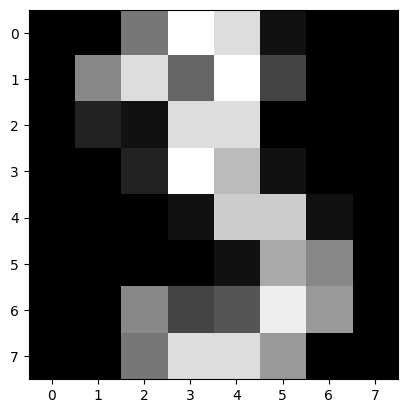

In [27]:
import matplotlib.pyplot as plt

plt.imshow(mnist.images[3], cmap="gray")

In [28]:
X = mnist.data

X.shape

(1797, 64)

In [33]:
y = (mnist.target == 3).astype("int")

y[:5]

array([0, 0, 0, 1, 0])

In [35]:
w = np.random.normal(0, 1, 64)
b = np.random.normal(0, 1)

w, b

(array([ 1.32918055, -0.2053847 , -0.5688101 ,  1.08365284, -0.65739298,
         0.52063614,  0.10450227,  1.12789935, -0.18708462, -0.62152639,
         1.30971687, -0.02587817,  0.56514076,  1.01636214,  0.75080944,
         1.20887823, -0.58646046, -1.06231922, -2.19711336, -0.3089122 ,
         0.84021876, -1.1858827 ,  0.79107674,  1.12854046, -0.76430905,
         1.5444201 ,  0.02466318, -0.39660382,  0.82519951,  0.8487093 ,
        -0.50934929,  1.26544211, -0.20083098,  1.20488634,  0.62170126,
         2.20316951,  0.05468404,  0.62268413, -0.20573694,  1.04282813,
         0.64303465,  1.07600864,  0.76518031, -0.09401241,  0.17131065,
         0.50635034, -0.80289089,  0.21853613,  1.30371869,  1.6536312 ,
        -1.02647754,  1.39713433, -0.38388156,  0.16261437, -1.36539728,
        -0.27125553,  0.96813027, -0.93248978,  0.41837654, -0.00437537,
        -0.95485018, -1.35369691,  0.64347463, -0.81256038]),
 -1.7697242238478563)

In [37]:
for t in range(1_000):
  fit_step(X, y)

P_sigmoid(mnist.data[3])

<ipython-input-5-0c27d935c79c>:4: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-z))


1.0

In [38]:
corrects = 0
fails = 0

for i in range(len(X)):
  xi = X[i]
  yi = y[i]

  y_predict = P_sigmoid(xi)

  if yi == 3:
    if int(y_predict) == 1:
      corrects += 1
    else:
      fails += 1
  else:
    if int(y_predict) == 0:
      corrects += 1
    else:
      fails += 1

corrects, fails

<ipython-input-5-0c27d935c79c>:4: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-z))


(1585, 212)

In [40]:
corrects / (corrects + fails) * 100

88.20255982192543

(8, 8)

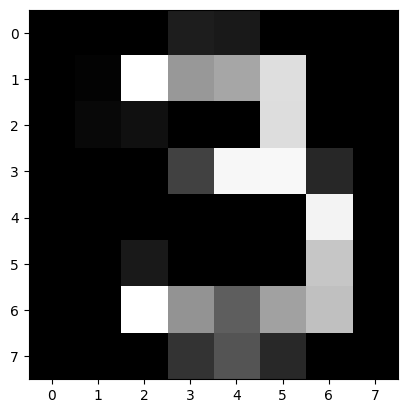

In [50]:
import PIL

imagen_3 = 255 - np.array(PIL.Image.open("digito_3.png").convert("L"))

plt.imshow(imagen_3, cmap="gray")

imagen_3.shape

In [52]:
xi = imagen_3.reshape(64)

xi

array([  0,   0,   0,  29,  25,   0,   0,   0,   0,   3, 255, 152, 166,
       222,   0,   0,   0,   8,  16,   0,   0, 221,   0,   0,   0,   0,
         0,  65, 247, 248,  39,   0,   0,   0,   0,   0,   0,   0, 244,
         0,   0,   0,  25,   0,   0,   0, 198,   0,   0,   0, 255, 148,
        94, 161, 192,   0,   0,   0,   0,  51,  84,  41,   0,   0],
      dtype=uint8)

In [53]:
P_sigmoid(xi)

1.0

In [58]:
from sklearn.linear_model import Perceptron

p = Perceptron(n_jobs=1_000)

p.fit(X, y)

p.predict([xi])

array([0])